<a href="https://colab.research.google.com/github/SelenaNahra/MachineLearning/blob/main/HW5Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Learning Rate (SGD):  0.1
Epoch 500, Training loss 0.0104, Validation loss 0.0171
Epoch 1000, Training loss 0.0101, Validation loss 0.0171
Epoch 1500, Training loss 0.0101, Validation loss 0.0172
Epoch 2000, Training loss 0.0101, Validation loss 0.0172
Epoch 2500, Training loss 0.0101, Validation loss 0.0172
Epoch 3000, Training loss 0.0101, Validation loss 0.0172
Epoch 3500, Training loss 0.0101, Validation loss 0.0172
Epoch 4000, Training loss 0.0101, Validation loss 0.0172
Epoch 4500, Training loss 0.0101, Validation loss 0.0172
Epoch 5000, Training loss 0.0101, Validation loss 0.0172

Learning Rate (Adam):  0.1
Epoch 500, Training loss 0.0101, Validation loss 0.0172
Epoch 1000, Training loss 0.0101, Validation loss 0.0172
Epoch 1500, Training loss 0.0101, Validation loss 0.0172
Epoch 2000, Training loss 0.0101, Validation loss 0.0172
Epoch 2500, Training

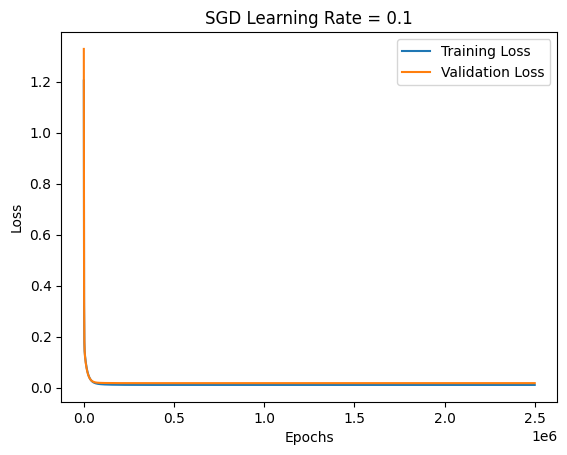

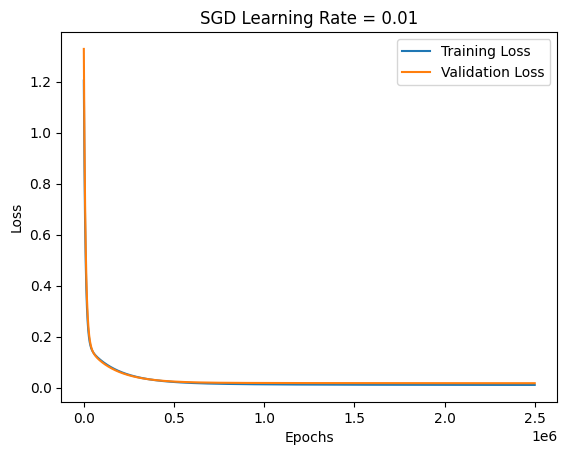

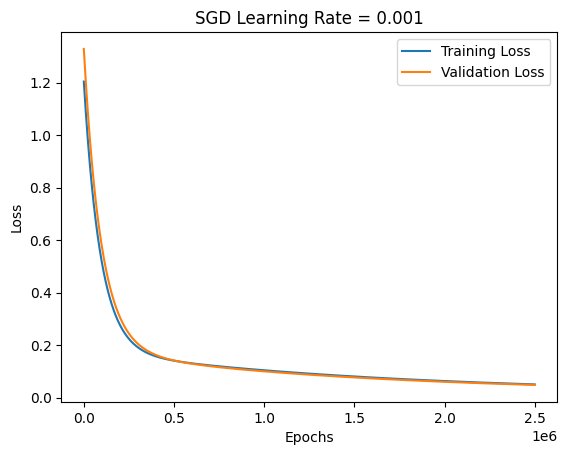

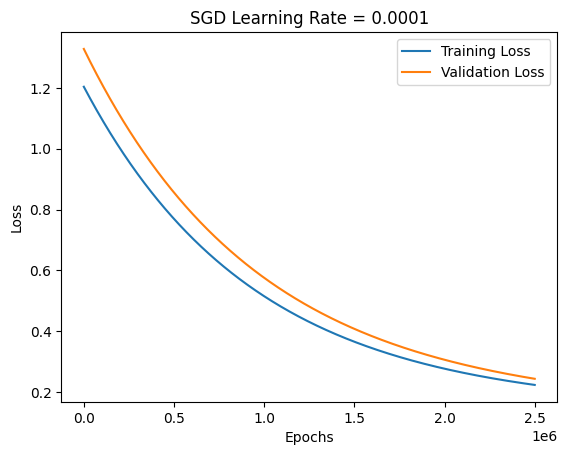

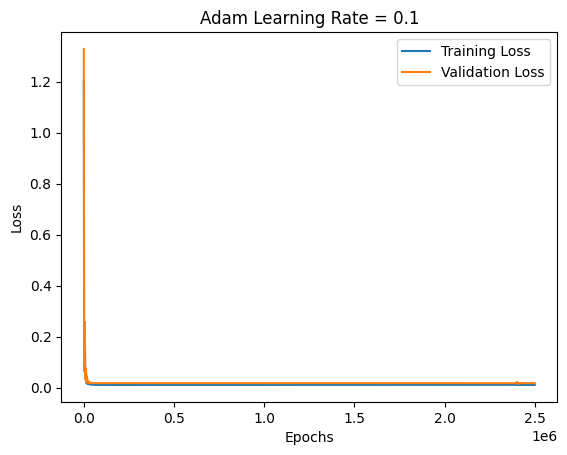

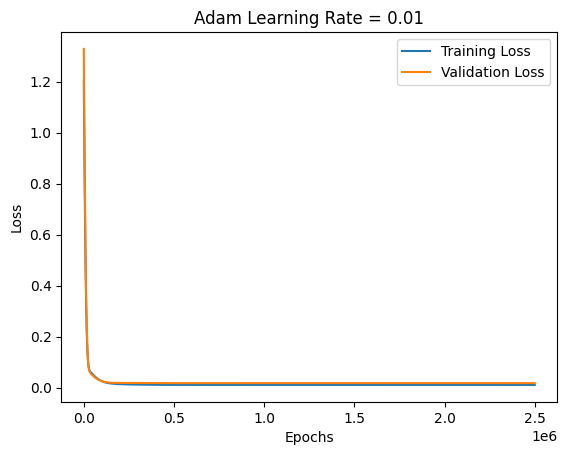

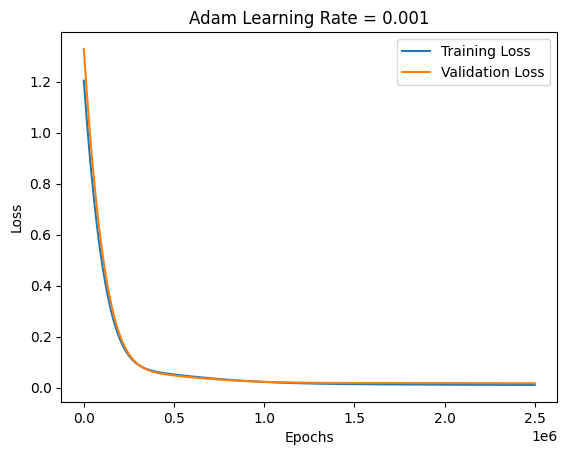

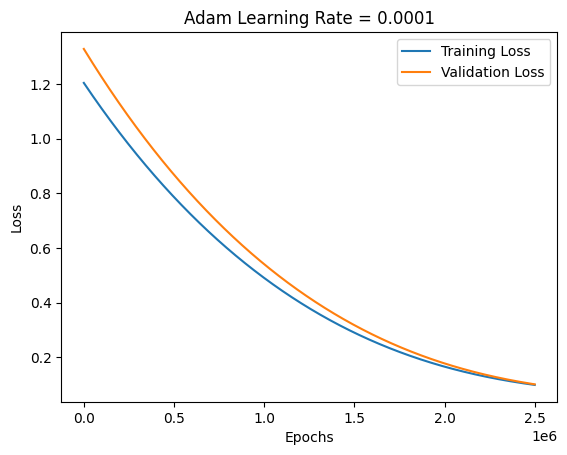

In [41]:
import numpy as np
import torch
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from google.colab import drive

# Mount Google Drive and load the dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Housing.csv'
housing = pd.read_csv(file_path)

# List of variables to map
vl = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[vl] = housing[vl].apply(binary_map)
housing = housing.drop('furnishingstatus', axis=1)

# Feature scaling
varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
scaler = preprocessing.MinMaxScaler()
housing[varlist] = scaler.fit_transform(housing[varlist])

# Split the data into training and validation sets
X = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
y = 'price'
X_train, X_val, y_train, y_val = train_test_split(housing[X], housing[y], test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
x_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
x_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

# Define a linear regression model
def model(x, w1, w2, w3, w4, w5, b):
    return w1 * x[:, 0] + w2 * x[:, 1] + w3 * x[:, 2] + w4 * x[:, 3] + w5 * x[:, 4] + b

# Loss function
def loss_fn(predict, y):
    squared_diffs = (predict - y) ** 2
    return squared_diffs.mean()

# Training loop
def training_loop(n_epochs, optimizer, params, x_train, x_val, y_train, y_val, train_losses, val_losses):
    for epoch in range(1, n_epochs + 1):

        w1, w2, w3, w4, w5, b = params

        train_predict = model(x_train, w1, w2, w3, w4, w5, b)
        val_predict = model(x_val, w1, w2, w3, w4, w5, b)

        train_loss = loss_fn(train_predict, y_train)
        val_loss = loss_fn(val_predict, y_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}")

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

    return params

# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Lists to store losses for plotting
train_losses_sgd = {}
val_losses_sgd = {}
train_losses_adam = {}
val_losses_adam = {}

# Define the plot_losses function
def plot_losses(train_losses, val_losses, optimizer, lr, title):
    plt.plot(range(500, len(train_losses) * 500 + 1, 500), train_losses, label=f'Training Loss')
    plt.plot(range(500, len(val_losses) * 500 + 1, 500), val_losses, label=f'Validation Loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{optimizer} Learning Rate = {lr}')
    plt.legend()
    plt.show()

# Training loop for both optimizers with different learning rates
for lr in learning_rates:
    # SGD
    params_sgd = torch.nn.Parameter(torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True))
    optimizer_sgd = torch.optim.SGD([params_sgd], lr=lr)

    print("\nLearning Rate (SGD): ", lr)
    train_losses_sgd[str(lr)] = []
    val_losses_sgd[str(lr)] = []
    training_loop(
        n_epochs=5000,
        optimizer=optimizer_sgd,
        params=params_sgd,
        x_train=x_train,
        x_val=x_val,
        y_train=y_train,
        y_val=y_val,
        train_losses=train_losses_sgd[str(lr)],
        val_losses=val_losses_sgd[str(lr)])

    # ADAM
    params_adam = torch.nn.Parameter(torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True))
    optimizer_adam = torch.optim.Adam([params_adam], lr=lr)

    print("\nLearning Rate (Adam): ", lr)
    train_losses_adam[str(lr)] = []
    val_losses_adam[str(lr)] = []
    training_loop(
        n_epochs=5000,
        optimizer=optimizer_adam,
        params=params_adam,
        x_train=x_train,
        x_val=x_val,
        y_train=y_train,
        y_val=y_val,
        train_losses=train_losses_adam[str(lr)],
        val_losses=val_losses_adam[str(lr)])

# Separate plots for SGD
for lr in learning_rates:
    plot_losses(train_losses_sgd[str(lr)], val_losses_sgd[str(lr)], 'SGD', lr, 'SGD Learning Rate Sweep')

# Separate plots for ADAM
for lr in learning_rates:
    plot_losses(train_losses_adam[str(lr)], val_losses_adam[str(lr)], 'Adam', lr, 'Adam Learning Rate Sweep')


Learning Rate (SGD):  0.1
Epoch 500, Training loss 0.0075, Validation loss 0.0135
Epoch 1000, Training loss 0.0074, Validation loss 0.0135
Epoch 1500, Training loss 0.0074, Validation loss 0.0135
Epoch 2000, Training loss 0.0074, Validation loss 0.0135
Epoch 2500, Training loss 0.0074, Validation loss 0.0135
Epoch 3000, Training loss 0.0074, Validation loss 0.0135
Epoch 3500, Training loss 0.0074, Validation loss 0.0135
Epoch 4000, Training loss 0.0074, Validation loss 0.0135
Epoch 4500, Training loss 0.0074, Validation loss 0.0135
Epoch 5000, Training loss 0.0074, Validation loss 0.0135

Learning Rate (Adam):  0.1
Epoch 500, Training loss 0.0074, Validation loss 0.0135
Epoch 1000, Training loss 0.0074, Validation loss 0.0135
Epoch 1500, Training loss 0.0074, Validation loss 0.0135
Epoch 2000, Training loss 0.0074, Validation loss 0.0135
Epoch 2500, Training loss 0.0074, Validation loss 0.0135
Epoch 3000, Training loss 0.0074, Validation loss 0.0135
Epoch 3500, Training loss 0.0074, V

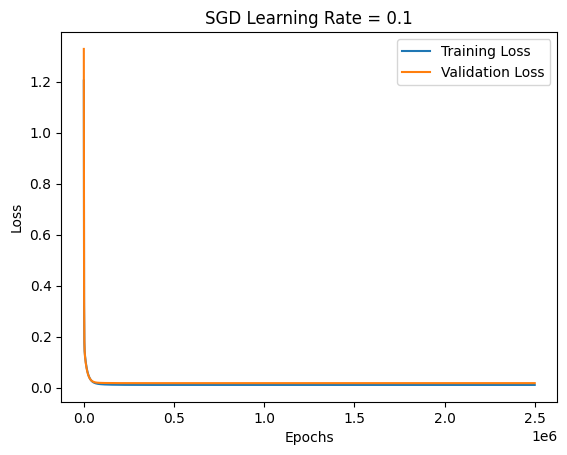

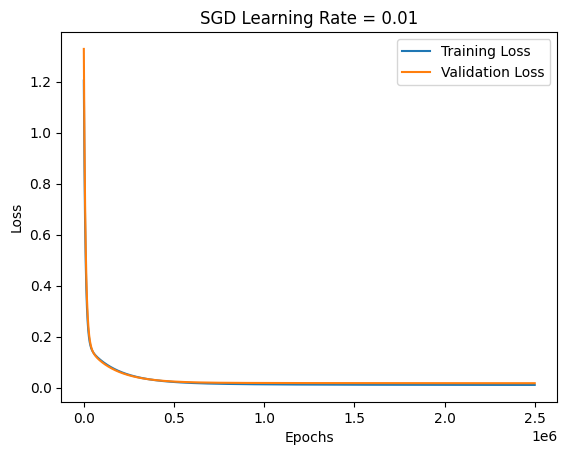

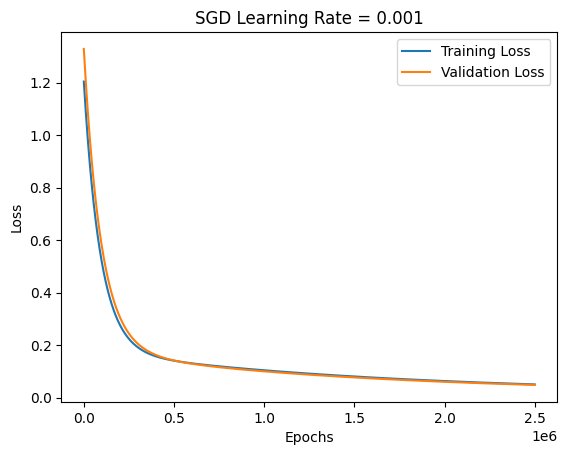

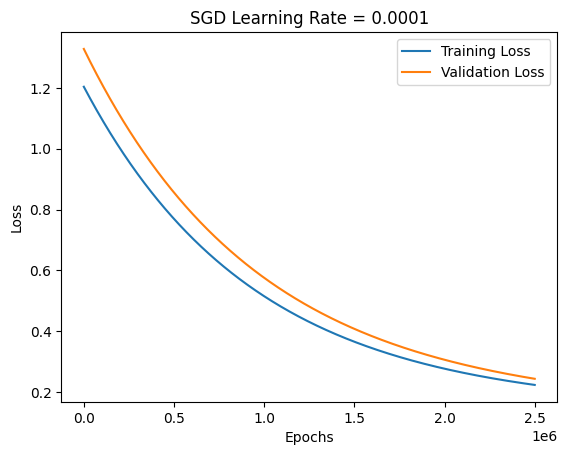

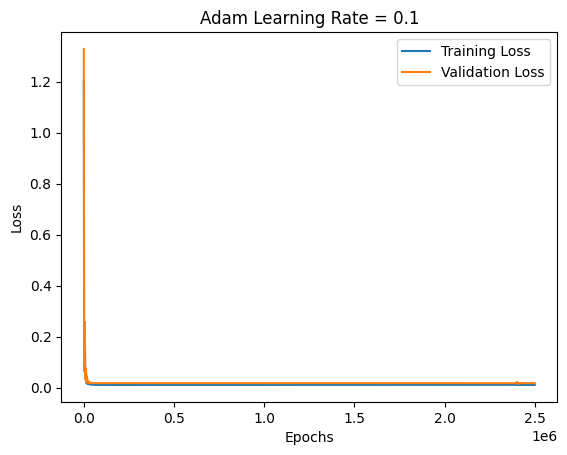

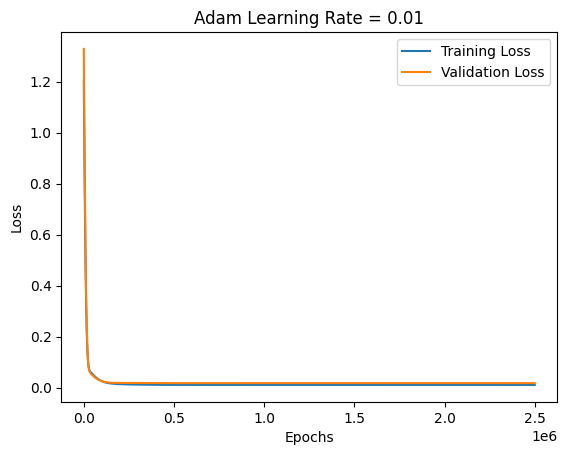

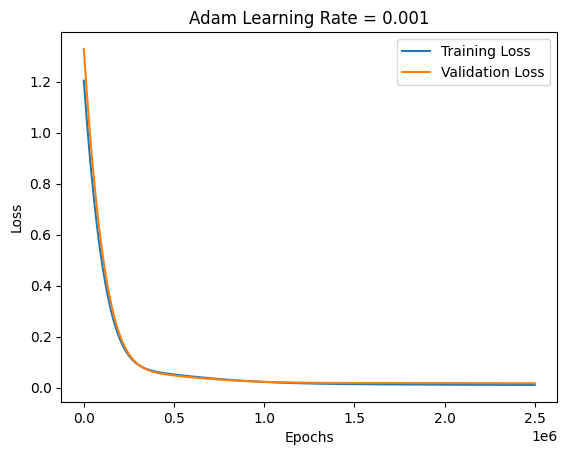

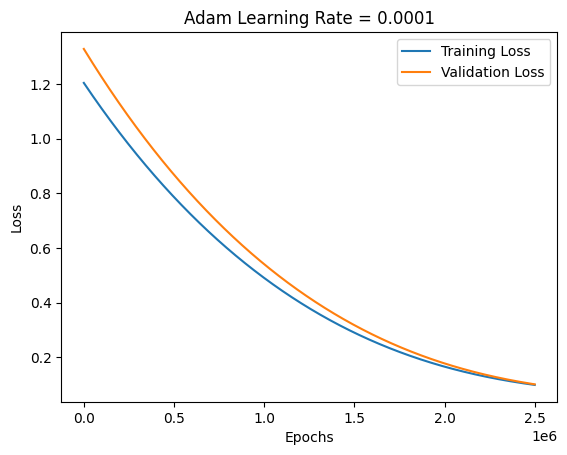

In [46]:
# Feature scaling
varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'price']
scaler = preprocessing.MinMaxScaler()
housing[varlist] = scaler.fit_transform(housing[varlist])

# Split the data into training and validation sets
X = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
y = 'price'
X_train, X_val, y_train, y_val = train_test_split(housing[X], housing[y], test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
x_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
x_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

# Define a linear regression model with binary variables
def model(x, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, b):
    return w1 * x[:, 0] + w2 * x[:, 1] + w3 * x[:, 2] + w4 * x[:, 3] + w5 * x[:, 4] + w6 * x[:, 5] + w7 * x[:, 6] + w8 * x[:, 7] + w9 * x[:, 8] + w10 * x[:, 9] + w11 * x[:, 10] + b

# Loss function
def loss_fn(predict, y):
    squared_diffs = (predict - y) ** 2
    return squared_diffs.mean()

# Training loop with plotting
def training_loop(n_epochs, optimizer, params, x_train, x_val, y_train, y_val):
    train_losses = []
    val_losses = []
    for epoch in range(1, n_epochs + 1):

        w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, b = params

        train_predict = model(x_train, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, b)
        val_predict = model(x_val, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, b)

        train_loss = loss_fn(train_predict, y_train)
        val_loss = loss_fn(val_predict, y_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}")

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

    return params

# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Training loop for both optimizers with different learning rates
for lr in learning_rates:
    # SGD
    params_sgd = torch.nn.Parameter(torch.tensor([1.0] * 12, requires_grad=True))
    optimizer_sgd = torch.optim.SGD([params_sgd], lr=lr)

    print("\nLearning Rate (SGD): ", lr)
    training_loop(
        n_epochs=5000,
        optimizer=optimizer_sgd,
        params=params_sgd,
        x_train=x_train,
        x_val=x_val,
        y_train=y_train,
        y_val=y_val)

    # ADAM
    params_adam = torch.nn.Parameter(torch.tensor([1.0] * 12, requires_grad=True))
    optimizer_adam = torch.optim.Adam([params_adam], lr=lr)

    print("\nLearning Rate (Adam): ", lr)
    training_loop(
        n_epochs=5000,
        optimizer=optimizer_adam,
        params=params_adam,
        x_train=x_train,
        x_val=x_val,
        y_train=y_train,
        y_val=y_val)

# Separate plots for SGD
for lr in learning_rates:
    plot_losses(train_losses_sgd[str(lr)], val_losses_sgd[str(lr)], 'SGD', lr, 'SGD Learning Rate Sweep')

# Separate plots for ADAM
for lr in learning_rates:
    plot_losses(train_losses_adam[str(lr)], val_losses_adam[str(lr)], 'Adam', lr, 'Adam Learning Rate Sweep')
